In [2]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9034 sha256=567cc8083dfa4e04a12907e49cce1efecccab2b185a1ff28ee0509a257db6abb
  Stored in directory: /root/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown


In [3]:
# !gdown https://drive.google.com/uc?id=1wPv2uKhMT4AljzMxWlLLUNY68xzfHTWl
# !gdown https://drive.google.com/uc?id=1X1_JTwEkQZOlZ0lWPqLR_dY4i4eG-06N
!gdown --id "0B6eKvaijfFUDQUUwd21EckhUbWs"

Downloading...
From: https://drive.google.com/uc?id=0B6eKvaijfFUDQUUwd21EckhUbWs
To: /kaggle/working/WIDER_train.zip
1.47GB [00:20, 70.6MB/s]


In [5]:
# !unzip "./WIDER_train.zip" -d "./WIDER_train"

In [6]:
Wider_path_train = "./WIDER_train/WIDER_train/images/"
Wider_label_test = "../input/labels/wider_face_train_bbx_gt.txt"

In [1]:
def getWide(train , label , size):
    """
    This function extracts images from mafa datset and return a 
    array of images with their labels
    """
    # wid_label
    data = []
    labels =[]
    import os
    import cv2
    with open(label , "r") as file:
      box =[]
      filename =""
      i =0
      for line in file.readlines():
        if len(line.split(" ")) > 5:
            box = line.split(" ")[:4]
            label  = line.split(" ")[8]
        elif len(line) > 10:
            filename = line
        else:
            box =[]
            filename =""
        if i < size:
            if filename != "" and len(box)>1:
                #open the image
                img_path = train+filename
                img_path = img_path.strip()
                if os.path.isfile(img_path):
                    image = cv2.imread(img_path)
                    label = label
                    #extract image face
                    x = int(box[0]) 
                    y= int(box[1])
                    w = int(box[2])  
                    h = int(box[3])
                    image = image[y:y+h, x:x+w]
                    #get only images 
                    #add image and label
                    data.append(image)
                    labels.append(label)

                    i = i +1
                    #print(os.path.isfile(img_path.strip()))

                    # print(f"File {filename}  Box {box} ")
                    #resize 
    print("DONE>>>>>")
    return data , labels

In [8]:
# wider_face_test_filelist.txt
import numpy as np
data1 , labels1 = getWide(Wider_path_train , Wider_label_test , 5000)
print("gotten")
data1 = np.array(data1)
labels1 = np.array(labels1)
np.save('widedata1.npy', data1)
np.save('widelabels.npy', labels1)

DONE>>>>>
gotten


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [2]:
# down load test
!gdown --id 0B6eKvaijfFUDd3dIRmpvSk8tLUk

Downloading...
From: https://drive.google.com/uc?id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
To: /kaggle/working/WIDER_val.zip
363MB [00:03, 116MB/s]  


In [4]:
# !unzip "./WIDER_val.zip" -d "./WIDER_val"

In [5]:
Wider_path_train1 = "./WIDER_val/WIDER_val/images/"
Wider_label_test1 = "../input/labels/wider_face_val_bbx_gt.txt"

In [6]:
# create test
import numpy as np
data2 , labels2 = getWide(Wider_path_train1 , Wider_label_test1 , 2000)
print("gotten")
data2 = np.array(data2)
labels2 = np.array(labels2)
np.save('widetest.npy', data2)
np.save('widetestLabel.npy', labels2)

DONE>>>>>
gotten


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [7]:
# deal with MAFA
# mafa data download
!gdown --id 1B4Z5YKATxWl7y7d9tIEl4vAjR-Za8czA

Downloading...
From: https://drive.google.com/uc?id=1B4Z5YKATxWl7y7d9tIEl4vAjR-Za8czA
To: /kaggle/working/data.npy
435MB [00:04, 102MB/s]  


In [8]:
#load data
import numpy as np

# load wider dataset for train
X = np.load('./widedata1.npy' , allow_pickle=True)
y = np.load('./widelabels.npy')

# wider dataset for test
X1 = np.load('./widetest.npy'  , allow_pickle=True)

y1 = np.load('./widetestLabel.npy')


# load mafa dataset
X2 = np.load('./data.npy'  , allow_pickle=True)

# load mafa labels
y2 = np.load('../input/mafalabels/mafalabels.npy')


In [9]:
# 1 for simple, 2 for complex and 3 for human body.
# we are combining the  partial and full/complex occlusion to form one label
import pandas as pd
y2 = pd.Series(y2).map({3:int(0) , 1:int(1) , 2:int(1) , -1:int(0)})

# merger partial and full occlusin
y = pd.Series(y).map({"0":int(0) , "1":int(1) , "2":int(1)})
y1 = pd.Series(y1).map({"0":int(0) , "1":int(1) , "2":int(1)})

In [10]:
np.unique(y)  , np.unique(y1)  , np.unique(y2) 

(array([0, 1]), array([0, 1]), array([0, 1]))

In [11]:
np.unique(y2)

array([0, 1])

In [12]:
def get_label(code):
    """
    Returns the corrected label name for image passed
    """
    label = {0:'None', 1:'occluded'}
    
    return label[code]


In [13]:
# check sizes
X.shape , y.shape ,X1.shape ,y1.shape , X2.shape , y2.shape

((5000,), (5000,), (2000,), (2000,), (4000,), (4000,))

In [14]:
X[10].shape

(77, 55, 3)

In [15]:
# resize all the images to a 32 by 32 shape

def changeSize(image):
    """
    Reisize all images to a size of 32*32
    """
    import cv2
    le , wi , _ =image.shape
    if le >32 and wi >32:
        image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_CUBIC)
        return image
    else:
        return None

In [16]:
# prepaire dataset1
new_X = []
new_y = []
for i in range(len(X)):
    img = changeSize(X[i])
    label = y[i]
    if img is not None:
        new_y.append(label)
        new_X.append(img)
    else:
        pass

In [17]:
# prepaire dataset2
new_X1 = []
new_y1 = []
for i in range(len(X1)):
    img = changeSize(X1[i])
    label = y1[i]
    if img is not None:
        new_y1.append(label)
        new_X1.append(img)
    else:
        pass

In [18]:
# prepare dataset 3
new_X2 = []
new_y2 = []
for i in range(len(X2)):
    img = changeSize(X2[i])
    label = y2[i]
    if img is not None:
        new_y2.append(label)
        new_X2.append(img)
    else:
        pass

In [19]:
# convert images to array
new_X=np.array(new_X)
new_X1=np.array(new_X1)
new_X2=np.array(new_X2)

# covert labels to array
new_y = np.array(new_y)
new_y1 = np.array(new_y1)
new_y2 = np.array(new_y2)

# check shape
new_X.shape ,new_y.shape, new_X1.shape ,new_y1.shape, new_X2.shape,new_y2.shape

((2866, 32, 32, 3),
 (2866,),
 (1252, 32, 32, 3),
 (1252,),
 (3633, 32, 32, 3),
 (3633,))

In [23]:
# add the array together

In [130]:
# concat the two dataframes
df = np.concatenate((new_X, new_X2))
y = np.concatenate((new_y , new_y2))

# add the x1
df = np.concatenate((df , new_X1))
y = np.concatenate((y , new_y1))

In [36]:
# check shape
df.shape , y.shape

((7751, 32, 32, 3), (7751,))

In [29]:
# reshuffle the data
from sklearn.utils import shuffle
df, y = shuffle(df, y, random_state=2021)

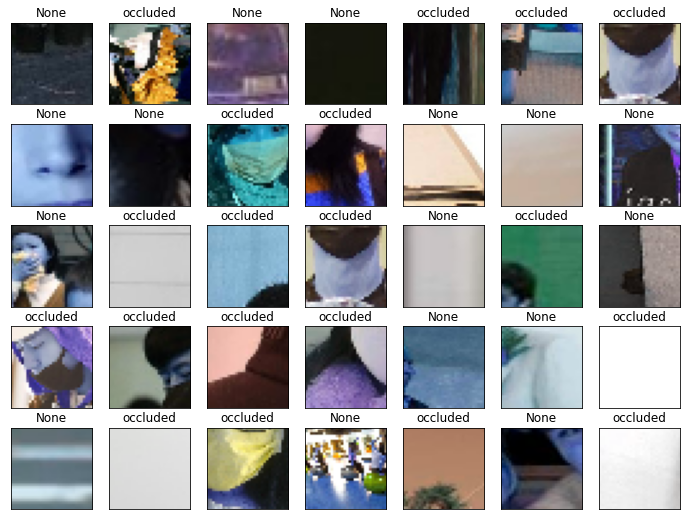

In [40]:
# draw some images
import matplotlib.pyplot as plt
import seaborn as sns
import random

# sample images
fig=plt.figure(figsize=(12, 9))
for i in range(35):
    choice =random.choice(range(df.shape[0]))
    try:
        plt.subplot(5,7, i+1)
        plt.subplot(5,7,i+1).set_title(get_label(int(y[choice])))
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(df[choice] , cmap=plt.cm.binary)
    except Exception as e:
        print(e)
        pass
plt.show()

In [41]:
# normalize the df
df = df/255.0

In [42]:
# reshape df to a 2D array
data =df.reshape((df.shape[0], 3072))

In [43]:
data.shape , y.shape

((7751, 3072), (7751,))

<AxesSubplot:title={'center':'Target Disribution'}, ylabel='count'>

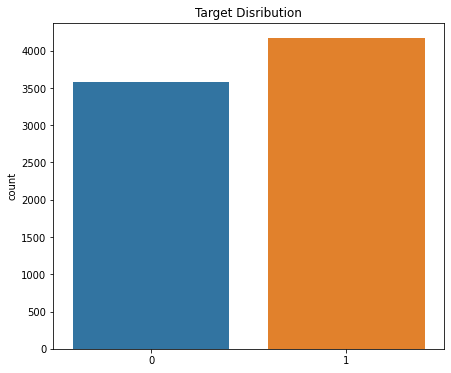

In [45]:
# check the distribution of the labels
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.title("Target Disribution")
sns.countplot(y)

In [46]:
# Normal machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [47]:
# split the data
Xtrain , Xtest , ytrain , ytest = train_test_split(data ,
                                                  y ,
                                                   test_size=0.15,
                                                  random_state=2021)

# 1. KKN CLASSIFIER

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
# fir the model
knn.fit(Xtrain ,ytrain)
# predictions
knn_preds = knn.predict(Xtest)
# check score
print(f"KNN with k=3 has accuracy of   {accuracy_score(ytest , knn_preds)}")

KNN with k=3 has accuracy of   0.6104901117798797


In [235]:
# evaluate
def drawConfusionMatrix(ytest , preds , Model):
    c_matrix = confusion_matrix(ytest ,preds)
    # plot confusion matrix for better view
    plt.figure(figsize=(4,4))
    sns.heatmap(c_matrix , annot= True ,fmt="" ,  annot_kws={"size": 10})
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    plt.title(f"Confusion Matrix Plot for {Model} classifier")
    plt.savefig(f"{Model}.png")

              precision    recall  f1-score   support

           0       0.59      0.34      0.43       506
           1       0.62      0.82      0.70       657

    accuracy                           0.61      1163
   macro avg       0.60      0.58      0.57      1163
weighted avg       0.61      0.61      0.58      1163



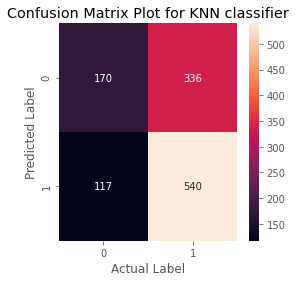

In [236]:
# classifciation reports
print(classification_report(ytest, knn_preds))

# draw accuracy matrix
drawConfusionMatrix(ytest , knn_preds , "KNN")

# 2. MLP CLASSIFIER

In [238]:
# USING MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2021)
mlp.fit(Xtrain , ytrain)
mlp_preds = mlp.predict(Xtest)
print(f"MLP has score of  {accuracy_score(ytest , mlp_preds)}")

MLP has score of  0.6001719690455718


In [249]:
# check some mlp model parameters used.
mlp.activation  , mlp.loss , mlp.n_layers_ , mlp.hidden_layer_sizes 

('relu', 'log_loss', 3, (100,))

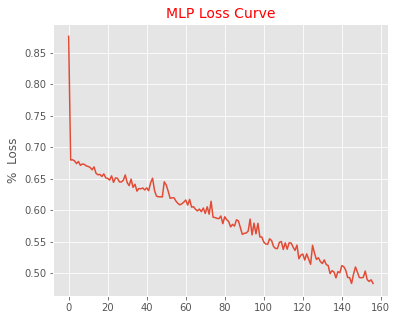

In [251]:
plt.figure(figsize=(6,5))
plt.title("MLP Loss Curve" , c ='r' , fontsize=14)
plt.plot(mlp.loss_curve_ )
plt.ylabel("%  Loss")
plt.savefig("mlp_loss.png")

              precision    recall  f1-score   support

           0       0.55      0.44      0.49       506
           1       0.63      0.72      0.67       657

    accuracy                           0.60      1163
   macro avg       0.59      0.58      0.58      1163
weighted avg       0.59      0.60      0.59      1163



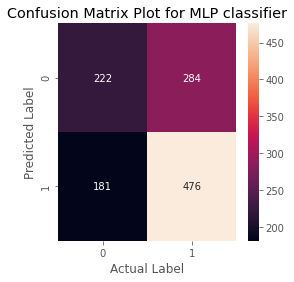

In [239]:
# classifciation reports
print(classification_report(ytest, mlp_preds))

drawConfusionMatrix(ytest , mlp_preds , "MLP")

# 3. RANDOM FOREST  CLASSIFIER

In [231]:
# try a tree model
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=450 , random_state=2021)
ran.fit(Xtrain ,ytrain)
ran_preds = ran.predict(Xtest)
print(f"Random Forest has  {accuracy_score(ytest , ran_preds)}")

Random Forest has  0.6354256233877902


              precision    recall  f1-score   support

           0       0.57      0.62      0.60       506
           1       0.69      0.65      0.67       657

    accuracy                           0.64      1163
   macro avg       0.63      0.63      0.63      1163
weighted avg       0.64      0.64      0.64      1163



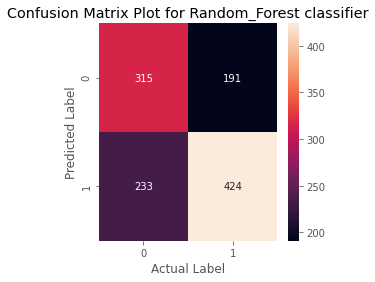

In [237]:
# classifciation reports
print(classification_report(ytest, ran_preds))
drawConfusionMatrix(ytest , ran_preds , "Random_Forest")

# TEST DEEP LEARNIGN ONES


## 4. Simple CNN CLASSIFIER

In [70]:
# models arch creations imports
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D , Conv2D , MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

**FOR DEEP LEARNIGN PART SIMPLE CNN WILL BE TESTED THEN A PRETRAINED DONE AND COMPARISON MADE**

**4. SIMMPLE CNN**

In [264]:
# for this part we need to pass images with 3D
# we need to reshape it back to original shape or 32*32*3

# split the df
from tensorflow.keras.utils import to_categorical
X_train , Xval , y_train , yval =train_test_split(df/255 ,
                                                 to_categorical(y) ,
                                                 test_size=0.15,
                                                 random_state =2021)

In [265]:
X_train.shape, Xval.shape, y_train.shape, yval.shape

((6588, 32, 32, 3), (1163, 32, 32, 3), (6588, 2), (1163, 2))

In [266]:
# create a sequentila model with each each
cnn_model = Sequential([
    Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32,3)),
    MaxPool2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
#     MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.1),
    Conv2D(16, 3, 3, activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Dropout(0.1),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(32 , activation ='relu'),
    Dense(2, activation='softmax'),
    
])

In [267]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 32)        36896     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 4, 4, 128)        

In [268]:
# get the number of layers
print(f"The model has  {len(cnn_model.layers)} layers")

The model has  17 layers


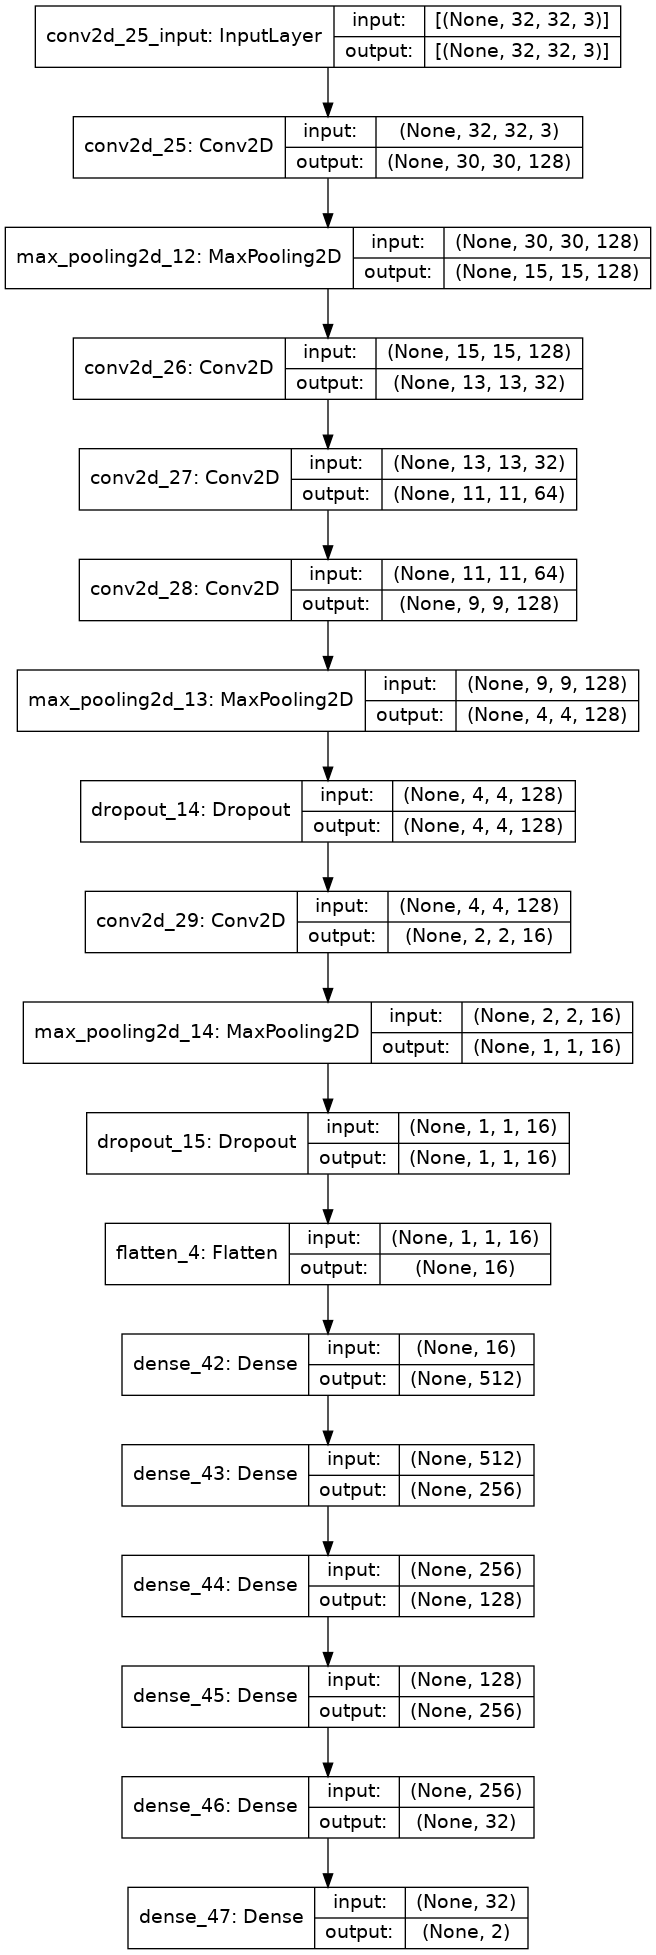

In [269]:
# !pip install graphviz
# get flow diagram for the model
dot_img_file = 'cnn_model.png'
tf.keras.utils.plot_model(cnn_model, to_file=dot_img_file, show_shapes=True)

In [270]:
# compile the model
# to_categorical
cnn_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [271]:
# Checkpoints while training
model_checkpoints_path = tf.keras.callbacks.ModelCheckpoint(
    'best_cnn_model',
    save_best_only=True,
    monitor='accuracy',
    verbose=1, 
    mode='max'
)

In [272]:
# train the model

cnn_history = cnn_model.fit(
    X_train,
    y_train, 
    batch_size=64, 
    epochs=50,
    validation_data=(Xval, yval), 
    callbacks=[model_checkpoints_path], 
    verbose=2, 
)

Epoch 1/50
103/103 - 2s - loss: 0.6838 - accuracy: 0.5454 - val_loss: 0.6758 - val_accuracy: 0.5916

Epoch 00001: accuracy improved from -inf to 0.54539, saving model to best_cnn_model
Epoch 2/50
103/103 - 2s - loss: 0.6710 - accuracy: 0.5921 - val_loss: 0.6948 - val_accuracy: 0.4910

Epoch 00002: accuracy improved from 0.54539 to 0.59214, saving model to best_cnn_model
Epoch 3/50
103/103 - 2s - loss: 0.6820 - accuracy: 0.5578 - val_loss: 0.6683 - val_accuracy: 0.6028

Epoch 00003: accuracy did not improve from 0.59214
Epoch 4/50
103/103 - 2s - loss: 0.6600 - accuracy: 0.6044 - val_loss: 0.6654 - val_accuracy: 0.6079

Epoch 00004: accuracy improved from 0.59214 to 0.60443, saving model to best_cnn_model
Epoch 5/50
103/103 - 2s - loss: 0.6534 - accuracy: 0.6100 - val_loss: 0.6619 - val_accuracy: 0.6174

Epoch 00005: accuracy improved from 0.60443 to 0.61005, saving model to best_cnn_model
Epoch 6/50
103/103 - 2s - loss: 0.6541 - accuracy: 0.6163 - val_loss: 0.6619 - val_accuracy: 0.5976

In [277]:
# evaluate
loss, acc = cnn_model.evaluate(Xval, yval, verbose=0)
print(f'Accuracy  {(acc * 100.0)}')
print(f'Loss  {(loss * 100.0)}')

Accuracy  62.68271803855896
Loss  133.02602767944336


In [278]:
cnn_preds =cnn_model.predict(Xval)

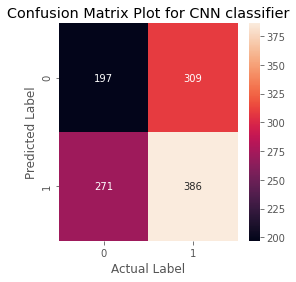

In [279]:
# np.unique(np.argmax(cnn_preds, axis=1))
cnn_preds = np.argmax(cnn_preds, axis=1)

# plot confusion matrix
drawConfusionMatrix(ytest , cnn_preds , "CNN")

In [280]:
# classification results
print(classification_report(yval.argmax(axis=1), cnn_preds))

              precision    recall  f1-score   support

           0       0.60      0.53      0.57       532
           1       0.64      0.71      0.67       631

    accuracy                           0.63      1163
   macro avg       0.62      0.62      0.62      1163
weighted avg       0.62      0.63      0.62      1163



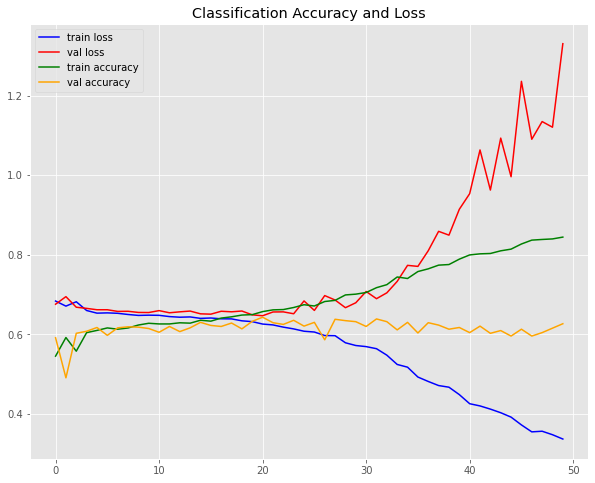

In [281]:
# loss plot
plt.figure(figsize=(10,8))
plt.title('Classification Accuracy and Loss')
plt.plot(cnn_history.history['loss'], color='blue', label='train loss')
plt.plot(cnn_history.history['val_loss'], color='red', label='val loss')
# plot accuracy
plt.plot(cnn_history.history['accuracy'], color='green', label='train accuracy')
plt.plot(cnn_history.history['val_accuracy'], color='orange', label='val accuracy')
plt.legend(loc = 'best')
plt.savefig("cnn.png")

In [ ]:
# cnn_history.history

## **5. USING MOBINET**

In [282]:
# create base model as mobinet that will be used for transfer learning
base = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(32, 32, 3)))
# create the head extension of the new model
head = base.output
# head = Conv2D(8, 3, 3, activation='elu')(head)
# head = AveragePooling2D(pool_size=(2, 2))(head)
head = Flatten(name="flatten")(head)
head = Dense(128, activation="relu")(head)
head = Dense(64, activation="relu")(head)
head = Dropout(0.5)(head)
head = Dense(2, activation="softmax")(head)
mobi_model = Model(inputs=base.input, outputs=head)

In [283]:
# check the new transfer model summary
mobi_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 16, 16, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

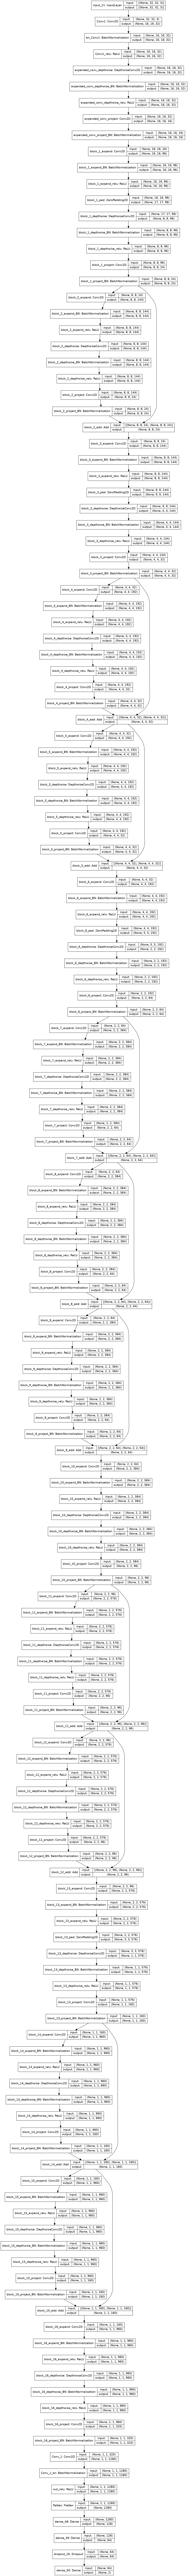

In [378]:

# get flow diagram for the model
dot_img_file = 'mobi_model.png'
tf.keras.utils.plot_model(mobi_model, to_file=dot_img_file, show_shapes=True)

In [284]:
# check the number of layers in base
len(base.layers)

154

In [285]:
# lets convert the labels into binary 
from tensorflow.keras.utils import to_categorical

# split the df
X_train , Xval , y_train , yval =train_test_split(df ,
                                                 to_categorical(y) ,
                                                 test_size=0.15,
                                                 random_state =2021)

In [286]:
X_train.shape, Xval.shape, y_train.shape, yval.shape

((6588, 32, 32, 3), (1163, 32, 32, 3), (6588, 2), (1163, 2))

In [287]:

# construct the training image generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.17,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

In [290]:
# time
import time
start_time = time.time()
# freeze all layers from the base to avoid update during traing
for layer in base.layers:
    layer.trainable = False

# compile 
LR = 1e-5
epochs = 40
batch =32

print("***** Started Compiling model and optimization...................")
mobi_model.compile(loss="binary_crossentropy", optimizer=Adam(lr=LR, decay=LR / epochs),metrics=["accuracy"])

# train 
print("Begin training ......")
history = mobi_model.fit(aug.flow(X_train, y_train, batch_size=batch),
                    steps_per_epoch=len(Xval) // batch,
                    validation_data=(Xval, yval),
                    validation_steps=len(Xval) // batch,
                    epochs=epochs)

print(f"The Model Took   {(time.time()-start_time)/60}  to run to completion")

***** Started Compiling model and optimization...................
Begin training ......
Epoch 1/40
36/36 [==============================] - 5s 64ms/step - loss: 0.6942 - accuracy: 0.5386 - val_loss: 0.6934 - val_accuracy: 0.5107
Epoch 2/40
36/36 [==============================] - 1s 28ms/step - loss: 0.6933 - accuracy: 0.5327 - val_loss: 0.6933 - val_accuracy: 0.5228
Epoch 3/40
36/36 [==============================] - 1s 28ms/step - loss: 0.6926 - accuracy: 0.5158 - val_loss: 0.6932 - val_accuracy: 0.5185
Epoch 4/40
36/36 [==============================] - 1s 29ms/step - loss: 0.6939 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5219
Epoch 5/40
36/36 [==============================] - 1s 27ms/step - loss: 0.6946 - accuracy: 0.4882 - val_loss: 0.6930 - val_accuracy: 0.5288
Epoch 6/40
36/36 [==============================] - 1s 28ms/step - loss: 0.6943 - accuracy: 0.5503 - val_loss: 0.6929 - val_accuracy: 0.5288
Epoch 7/40
36/36 [==============================] - 1s 28ms/step -

In [291]:
# evaluate
loss, acc = mobi_model.evaluate(Xval, yval, verbose=0)
print(f'Accuracy  {(acc * 100.0)}')
print(f'Loss  {(loss * 100.0)}')

Accuracy  59.24333333969116
Loss  69.02236938476562


In [292]:
# test the model
print("Start Evaluating...")
preds = mobi_model.predict(Xval, batch_size=batch)
# get the max predicted output
preds = np.argmax(preds, axis=1)


Start Evaluating...


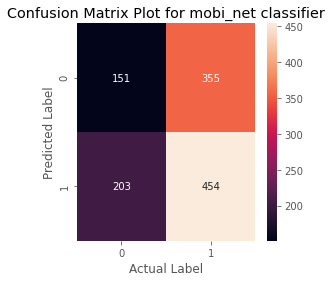

In [293]:
drawConfusionMatrix(ytest ,preds , "mobi_net")

In [294]:
# show report
print(classification_report(yval.argmax(axis=1), preds))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47       532
           1       0.60      0.77      0.67       631

    accuracy                           0.59      1163
   macro avg       0.59      0.58      0.57      1163
weighted avg       0.59      0.59      0.58      1163



In [221]:
# save
print("Saving the model for future use...")
mobi_model.save("mmobinet.model", save_format="h5")

Saving the model for future use...


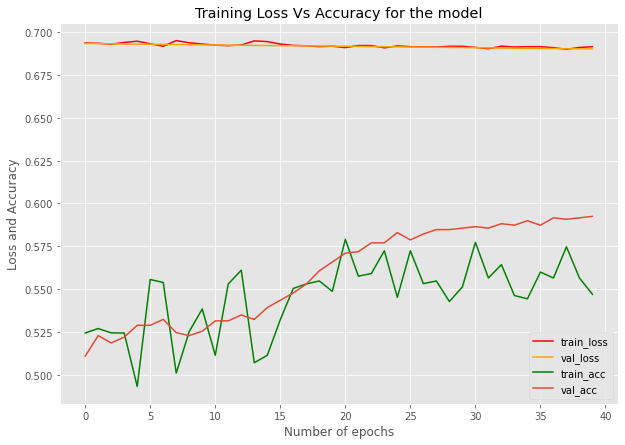

In [295]:
# do some plotings to see the model progress in accuracy and loss
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss" , c ='r')
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss" , c ='orange')
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc" , c ='green')
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss Vs Accuracy for the model")
plt.xlabel("Number of epochs")
plt.ylabel("Loss and Accuracy")
plt.legend(loc="lower right")
plt.savefig("mobi_net_model.png")

**FINAL MODEL SELECTED IS RANDOMTREE CLASSIFIER**

- In order to use it the image must be reshared to a 2D array

In [334]:
mlp.predict(df[100].reshape(1,-1))

array([1])

In [324]:
y[100]

0

In [325]:
cnn_model.predict(df[100].reshape(1,32,32,3)).argmax()

1

## **MODEL IMPLIMENTATION USING UI**

In [376]:
def get_label(code):
    label = {0:'Not occluded', 1:'occluded'}
    
    return label[code]
# resize all the images to a 32 by 32 shape

def changeSize(image):
    import cv2
    le , wi , _ =image.shape
    if le >32 and wi >32:
        image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_CUBIC)
        return image
    else:
        return None
    
def main():
    """
    Main function that is used for prediction of user inputed images live.
    """
    #load model 
    from tensorflow.keras.models import load_model
    import os
    import cv2
    haar_cascade_filepath = cv2.data.haarcascades + '/haarcascade_frontalface_default.xml'
    #face classifier model
    classifier=cv2.CascadeClassifier(haar_cascade_filepath)
    # load the face occlusion detector detector model from disk
    mask_model = load_model("mmobinet.model")
    while True:
        print("\n\n")
        img_path = input("Enter Image Path to predict or press 1 to exit :  ")
        if img_path == "1":
            break;
        else:
            if os.path.isfile(img_path):
                image = cv2.imread(img_path)
                box=classifier.detectMultiScale(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),1.3,5)
                #take the fist face only
#                 print(box)
                if len(box)!=0:
                    if len(box)>1:
                        face = box[0]
                    elif len(box)==1:
                        face = box[0]

                    #extract image face
                    x = int(face[0]) 
                    y= int(face[1])
                    w = int(face[2])  
                    h = int(face[3])
                    image = image[y:y+h, x:x+w]

                    #do prediction
                    resized_img = changeSize(image)

                    if resized_img is not None:
                        pred = mask_model.predict(resized_img.reshape(1,32,32,3))
                        prd_idx = pred.argmax()
                        print(f"Predicted LAbel is  {get_label(prd_idx)} with accuracy of  {round(pred.max()*100 ,4)}%")
                    else:
                        print("Image cannot be prediced")
                else:
                    print("NO Face found in the image")
            else:
                print("Unknown Directory")
# ./WIDER_train/WIDER_train/images/20--Family_Group/20_Family_Group_Family_Group_20_304.jpg
# ./WIDER_train/WIDER_train/images/20--Family_Group/20_Family_Group_Family_Group_20_999.jpg

In [377]:
main()

Enter Image Path to predict or press 1 to exit :   ./WIDER_train/WIDER_train/images/20--Family_Group/20_Family_Group_Family_Group_20_304.jpg


Predicted LAbel is  Not occluded with accuracy of  50.9907%





Enter Image Path to predict or press 1 to exit :   ./WIDER_train/WIDER_train/images/20--Family_Group/20_Family_Group_Family_Group_20_999.jpg


Predicted LAbel is  Not occluded with accuracy of  50.3793%





Enter Image Path to predict or press 1 to exit :   ./WIDER_train/WIDER_train/images/20--Family_Group/20_Family_Group_Family_Group_20_753.jpg


Image cannot be prediced





Enter Image Path to predict or press 1 to exit :   1
